In [8]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
np.random.seed(42)
x = np.random.rand(100,1) -0.5
y = 3*x**2 + 0.05* np.random.randn(100,1)

In [11]:
x

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [12]:
y

array([[ 5.15728987e-02],
       [ 5.94479790e-01],
       [ 1.66051606e-01],
       [-7.01779562e-02],
       [ 3.43985933e-01],
       [ 3.72874939e-01],
       [ 6.59764984e-01],
       [ 3.76341398e-01],
       [-9.75194335e-03],
       [ 1.04794741e-01],
       [ 7.35287787e-01],
       [ 6.78883363e-01],
       [ 3.05066318e-01],
       [ 2.73909733e-01],
       [ 3.08559932e-01],
       [ 3.49130363e-01],
       [ 7.98606436e-02],
       [-1.45444646e-02],
       [-5.71096619e-03],
       [ 5.75800683e-02],
       [ 5.23392240e-02],
       [ 4.02946793e-01],
       [ 1.29867214e-01],
       [ 4.18481141e-02],
       [-6.49789982e-02],
       [ 2.22943721e-01],
       [ 2.53451786e-01],
       [-3.95060058e-02],
       [ 1.75570720e-02],
       [ 6.37324227e-01],
       [ 1.29006981e-01],
       [ 3.34391950e-01],
       [ 5.80417870e-01],
       [ 6.00772381e-01],
       [ 5.54501010e-01],
       [ 2.84001079e-01],
       [ 1.17538848e-01],
       [ 6.08765289e-01],
       [ 9.2

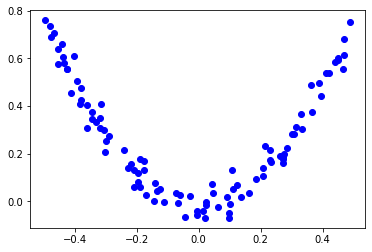

In [14]:
plt.plot(x,y,'bo')
plt.show()

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
gbrt = GradientBoostingRegressor(n_estimators=3,learning_rate= 1.0, max_depth=2)

In [33]:
gbrt.fit(x,y)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [34]:
x_test = np.linspace(-0.5,0.5,50).reshape(-1,1)
pred = gbrt.predict(x_test)

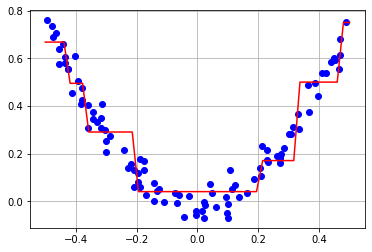

In [41]:
plt.plot(x,y,'bo')
plt.plot(x_test,pred,'r-')
plt.plot()
plt.grid()
plt.show()

D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


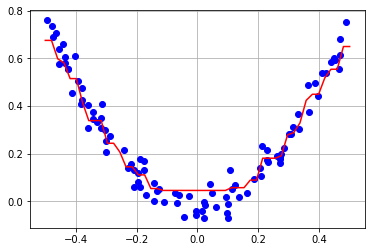

In [42]:
gbrt_lr_0_1 = GradientBoostingRegressor(n_estimators=30,learning_rate= 0.1, max_depth=2,random_state=42)
gbrt_lr_0_1.fit(x,y)
pred_lr_0_1 = gbrt_lr_0_1.predict(x_test)
plt.plot(x,y,'bo')
plt.plot(x_test,pred_lr_0_1,'r-')
plt.plot()
plt.grid()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train,x_valid,y_train,y_valid = train_test_split(x,y)

In [50]:
gbrt_var = GradientBoostingRegressor(learning_rate= 0.1,max_depth=2, random_state=42, warm_start=True)
previous_error = float('inf')
error_increase = 0
counter = 0
for n_estimators in range(1,200):
    counter +=1
    gbrt_var.n_estimators = n_estimators
    gbrt_var.fit(x_train,y_train)
    error = mean_squared_error(y_valid,gbrt_var.predict(y_valid))
    if error < previous_error:
        previous_error = error
        error_increase =0
    else:
        error_increase+=1
        if error_increase == 5:
            break
print(f'the loop ran {counter} times')
print(f'the best n_estimator number is {counter -5}')

the loop ran 32 times
the best n_estimator number is 27
D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam